In [3]:
#!pip install  nbconvert[webpdf]
import nbconvert
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
excel_file = "BSP_Inflation.xlsx"  # Replace with the actual file path
sheet_name = "Sheet1"
import matplotlib.pyplot as plt
# Read the data from the specified sheet into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)
df = df.fillna(method='ffill')

#print(df.head())
print(len(df))
date = df['Date']
print(df.columns)


72
Index(['Date', 'GDP', 'CommodityInflation', 'ExcessReturn', 'Inflation',
       'PolicyRate'],
      dtype='object')


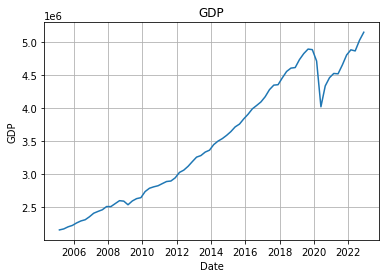

In [9]:
GDP = df['GDP']
GDP = np.array(GDP)
Inflation = df['Inflation']
Inflation = np.array(Inflation)
plt.plot(date, GDP)
Rate = df['PolicyRate']
Rate = np.array(Rate)
WinfC = df['CommodityInflation']
WinfC = np.array(WinfC)
ExRet= df['ExcessReturn']
ExRet  = np.array(ExRet)
plt.title('GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
#plt.legend('GDP')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Inflation')

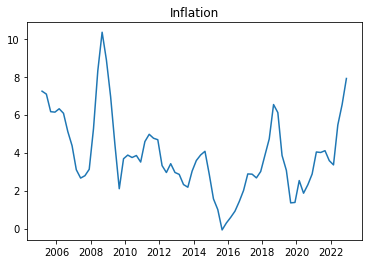

In [4]:
plt.plot(date, Inflation)
plt.title('Inflation')

Text(0.5, 1.0, 'Growth and Output Gap')

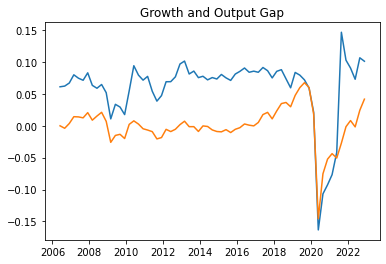

In [5]:
import statsmodels.api as sm

ygrowth = np.log(GDP[5:]) - np.log(GDP[:-5])
ygap, ytrend = sm.tsa.filters.hpfilter(np.log(GDP))
plt.plot(date[5:], ygrowth)
plt.plot(date[5:], ygap[5:])
plt.title('Growth and Output Gap')



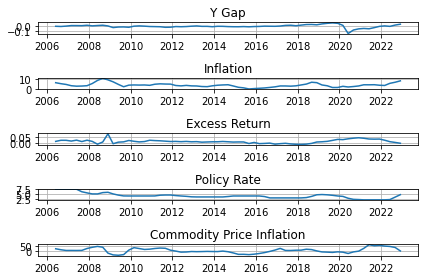

In [6]:
import matplotlib.pyplot as plt

# Create the first subplot (top)
plt.subplot(5, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(date[5:], ygap[5:])
plt.title('Y Gap')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range


# Create the second subplot (bottom)
plt.subplot(5, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Inflation[5:])
plt.title('Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,3)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], ExRet[5:])
plt.title('Excess Return')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,4)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], Rate[5:])
plt.title('Policy Rate')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range

plt.subplot(5, 1,5)  # 2 rows, 1 column, second subplot
plt.plot(date[5:], WinfC[5:])
plt.title('Commodity Price Inflation')  # Add a title if desired
plt.grid(True)  # Add grid to the first subplot
plt.axis('tight')  # Set axis limits to the data range



# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()


In [7]:
import yfinance as yf
import pandas as pd

# Define the currency pair symbol




# Define the currency pair symbol (CNY/USD) and date range
currency_pair = "PHPUSD=X"  # Yahoo Finance symbol for CNY/USD
start_date = "2005-01-01"
end_date = "2023-01-01"

# Fetch historical data
ph_data = yf.download(currency_pair, start=start_date, end=end_date, progress=False)

# Reset the index to access date as a column
ph_data.reset_index(inplace=True)

In [8]:

import numpy as np
ygap1 = ygap[5:]
# Assuming your arrays are originally 1D arrays or lists
ygrowth = np.array(ygrowth).reshape(-1, 1)  # Convert to a column vector
ygap1 = np.array(ygap1).reshape(-1, 1)  # Convert to a column vector
Inflation = np.array(Inflation[5:]).reshape(-1, 1)
ExRet = np.array(ExRet[5:]).reshape(-1, 1)
Rate = np.array(Rate[5:]).reshape(-1, 1)
WinfC = np.array(WinfC[5:]).reshape(-1, 1)

# Now you can concatenate them along axis 1
X = np.concatenate((ygap1, Inflation, ExRet, Rate, WinfC), axis=1)




In [9]:
Y = Inflation[5:]
X1 = X[:-5,:]

In [10]:
import statsmodels.api as sm

# Assuming you have your dependent variable y and independent variable(s) X
# Add a constant term to the independent variables
X11 = sm.add_constant(X1)
Ytrain = Y[1:55]
Xtrain = X11[1:55,:]
Xtrain_normalized  = (Xtrain-np.min(Xtrain))/(np.max(Xtrain)-np.min(Xtrain))
Ytest = Y[55:]
Xtest = X11[55:,:]
Xtest_normalized =  (Xtest-np.min(Xtrain))/(np.max(Xtrain)-np.min(Xtrain))

# Fit the OLS regression model
model = sm.OLS(Ytrain, Xtrain_normalized).fit()
forecast = model.predict(Xtest_normalized)
error_ols = Ytest[:,0] - forecast
RMSQ_ols = np.sqrt(np.mean(error_ols**2))
print(RMSQ_ols)

# Print the summary of the regression results
print(model.summary())
print(error_ols)


3.1565710091330557
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     6.526
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           0.000105
Time:                        15:49:45   Log-Likelihood:                -100.30
No. Observations:                  54   AIC:                             212.6
Df Residuals:                      48   BIC:                             224.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -86.1659   1854.773 

In [11]:
print(error_ols.shape)
print(forecast.shape)
print(Ytest.shape)
print(Ytest[:,0] - forecast)

(7,)
(7,)
(7, 1)
[1.07797727 2.72755579 2.24805205 2.04347692 3.71464329 3.40500605
 5.1501273 ]


In [12]:
Xtrain_normalized.shape

(54, 6)

In [16]:
import numpy as np
import statsmodels.api as sm

# Define the window size (you can adjust this)
window_size =   40

# Initialize arrays to store errors and RMSE
errors = []
RMSEs = []

# Loop through the data with the moving window
for i in range(len(Y) - window_size + 1):
    # Define the training and testing sets for this window
    Ytrain = Y[i : i + window_size]
    Xtrain = X11[i : i + window_size, :]
    Xtrain_normalized = (Xtrain - np.min(Xtrain)) / (np.max(Xtrain) - np.min(Xtrain))
    Ytest = Y[i + window_size : i + window_size + 1]
    Xtest = X11[i + window_size : i + window_size + 1, :]
    Xtest_normalized = (Xtest - np.min(Xtrain)) / (np.max(Xtrain) - np.min(Xtrain))

    if len(Ytest) > 0:  # Check if the testing set is not empty
        # Fit the OLS regression model for this window
        model = sm.OLS(Ytrain, Xtrain_normalized).fit()
        forecast = model.predict(Xtest_normalized)
        error_ols = Ytest[0] - forecast
        RMSQ_ols = np.sqrt(np.mean(error_ols ** 2))

        # Append errors and RMSE to the respective arrays
        errors.append(error_ols)
        RMSEs.append(RMSQ_ols)

# Print the RMSE for each forecast
for i, RMSE in enumerate(RMSEs):
    print(f"RMSE for forecast {i + 1}: {RMSE}")

# Print the summary of the last regression results
print(model.summary())

# Print the errors for each forecast
# for i, error in enumerate(errors):
#     print(f"Errors for forecast {i + 1}: {error}")


RMSE for forecast 1: 0.6700581592415515
RMSE for forecast 2: 0.6224569287643122
RMSE for forecast 3: 1.80936503144639
RMSE for forecast 4: 2.4898296216939557
RMSE for forecast 5: 4.404998909595731
RMSE for forecast 6: 2.684921401555323
RMSE for forecast 7: 0.2244142716627766
RMSE for forecast 8: 1.263572586632404
RMSE for forecast 9: 3.1931562099026927
RMSE for forecast 10: 2.6814923718414487
RMSE for forecast 11: 0.9936678903780898
RMSE for forecast 12: 0.03364369056374428
RMSE for forecast 13: 0.01191814616647191
RMSE for forecast 14: 1.2403919872335702
RMSE for forecast 15: 0.13865811655712168
RMSE for forecast 16: 1.7509363017393298
RMSE for forecast 17: 3.912609257396672
RMSE for forecast 18: 0.6871280157867687
RMSE for forecast 19: 0.9312598887520611
RMSE for forecast 20: 0.4292032638404537
RMSE for forecast 21: 1.1771802448569675
RMSE for forecast 22: 1.3894937975012
                            OLS Regression Results                            
Dep. Variable:                    

In [17]:
print(len(errors))

22


In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Generate random data for training


n_timesteps = 1
n_features = 4

Ytrain = Y[1:55]
Xtrain_normalized1 = Xtrain_normalized[:,1:]

Ytest = Y[55:]
Xtest_normalized1 = Xtest_normalized[:,1:]

n_samples = len(Ytrain)
n_timesteps = 1

nrows, ncols = Xtest_normalized1.shape

n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(SimpleRNN(units=8, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

Xtrain_normalized2 = Xtrain_normalized1.reshape(Xtrain_normalized1.shape[0],1,n_features)
# Train the model
model.fit(Xtrain_normalized2, Ytrain, epochs=500, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_normalized2= Xtest_normalized1.reshape(Xtest_normalized1.shape[0], 1, Xtest_normalized1.shape[1])
predictions = model.predict(Xtest_normalized2)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/500
2/2 [==============================] - 1s 5ms/step - loss: 14.4720
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 14.2774
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 14.0840
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 13.8826
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 13.7012
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 13.5152
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 13.3261
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 13.1437
Epoch 9/500
2/2 [==============================] - 0s 997us/step - loss: 12.9562
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 12.7829
Epoch 11/500
2/2 [==============================] - 0s 3ms/step - loss: 12.5936
Epoch 12/500
2/2 [==============================] - 0s 4ms/step - loss: 12.4294
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 4.0078
Epoch 207/500
2/2 [==============================] - 0s 4ms/step - loss: 4.0069
Epoch 208/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0063
Epoch 209/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0064
Epoch 210/500
2/2 [==============================] - 0s 4ms/step - loss: 4.0049
Epoch 211/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0044
Epoch 212/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0036
Epoch 213/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0037
Epoch 214/500
2/2 [==============================] - 0s 3ms/step - loss: 4.0025
Epoch 215/500
2/2 [==============================] - 0s 5ms/step - loss: 4.0020
Epoch 216/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0014
Epoch 217/500
2/2 [==============================] - 0s 2ms/step - loss: 4.0007
Epoch 218/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 3.9258
Epoch 411/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9254
Epoch 412/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9251
Epoch 413/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9245
Epoch 414/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9243
Epoch 415/500
2/2 [==============================] - 0s 998us/step - loss: 3.9237
Epoch 416/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9233
Epoch 417/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9229
Epoch 418/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9225
Epoch 419/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9222
Epoch 420/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9217
Epoch 421/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9212
Epoch 422/500
2/2 [==============================] -

In [16]:
rmsq_nn = np.sqrt(np.mean(error**2))


In [17]:
rmsq_nn


2.072220933376596

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate random data for training


n_timesteps = 1

# Ytrain = Y[1:55]
# Xtrain = X11[1:55,1:]
# Ytest = Y[55:]
# Xtest = X11[55:,1:]

# n_samples = len(Ytrain)
# n_timesteps = 1

# nrows, ncols = Xtest.shape

# n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(LSTM(units=4, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')


Xtrain_normalized2 = Xtrain_normalized1.reshape(Xtrain_normalized1.shape[0],1,n_features)
# Train the model
model.fit(Xtrain_normalized2, Ytrain, epochs=500, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_normalized2= Xtest_normalized1.reshape(Xtest_normalized1.shape[0], 1, Xtest_normalized1.shape[1])
predictions = model.predict(Xtest_normalized2)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/500
2/2 [==============================] - 1s 3ms/step - loss: 15.8133
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 15.7711
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 15.7260
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 15.6839
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 15.6423
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 15.5994
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 15.5571
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 15.5151
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 15.4732
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 15.4309
Epoch 11/500
2/2 [==============================] - 0s 5ms/step - loss: 15.3914
Epoch 12/500
2/2 [==============================] - 0s 5ms/step - loss: 15.3497
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 3ms/step - loss: 6.6668
Epoch 206/500
2/2 [==============================] - 0s 2ms/step - loss: 6.6315
Epoch 207/500
2/2 [==============================] - 0s 4ms/step - loss: 6.5898
Epoch 208/500
2/2 [==============================] - 0s 2ms/step - loss: 6.5570
Epoch 209/500
2/2 [==============================] - 0s 4ms/step - loss: 6.5189
Epoch 210/500
2/2 [==============================] - 0s 3ms/step - loss: 6.4792
Epoch 211/500
2/2 [==============================] - 0s 4ms/step - loss: 6.4438
Epoch 212/500
2/2 [==============================] - 0s 4ms/step - loss: 6.4083
Epoch 213/500
2/2 [==============================] - 0s 3ms/step - loss: 6.3734
Epoch 214/500
2/2 [==============================] - 0s 5ms/step - loss: 6.3368
Epoch 215/500
2/2 [==============================] - 0s 3ms/step - loss: 6.3030
Epoch 216/500
2/2 [==============================] - 0s 4ms/step - loss: 6.2662
Epoch 217/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 3.9368
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9356
Epoch 411/500
2/2 [==============================] - 0s 4ms/step - loss: 3.9345
Epoch 412/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9342
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9323
Epoch 414/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9315
Epoch 415/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9303
Epoch 416/500
2/2 [==============================] - 0s 2ms/step - loss: 3.9295
Epoch 417/500
2/2 [==============================] - 0s 4ms/step - loss: 3.9287
Epoch 418/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9275
Epoch 419/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9266
Epoch 420/500
2/2 [==============================] - 0s 3ms/step - loss: 3.9263
Epoch 421/500
2/2 [==============================] - 0

In [19]:
rmsq_lstm = np.sqrt(np.mean(error**2))

In [20]:
print(rmsq_lstm)

2.0761731520412146


In [21]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Generate random data for training


n_timesteps = 1
n_features = 4

Ytrain = Y[1:55]
Xtrain = X11[1:55,1:]
Ytest = Y[55:]
Xtest = X11[55:,1:]

n_samples = len(Ytrain)
n_timesteps = 1

nrows, ncols = Xtest.shape

n_features = ncols

# Create a GRU network
model = Sequential()
#model.add(GRU(4, activation='tanh', input_shape=(n_timesteps, n_features)))
#model.add(Dense(1))  # Output layer
# Create an Elman Recurrent Network
model = Sequential()
model.add(GRU(units=4, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')



Xtrain_normalized2 = Xtrain_normalized1.reshape(Xtrain_normalized1.shape[0],1,n_features)
# Train the model
model.fit(Xtrain_normalized2, Ytrain, epochs=1000, batch_size=32)

# Generate new data for prediction (you can replace this with your own test data)

# Make predictions
Xtest_normalized2= Xtest_normalized1.reshape(Xtest_normalized1.shape[0], 1, Xtest_normalized1.shape[1])
predictions = model.predict(Xtest_normalized2)

error =  Ytest - predictions

print("Predictions:", predictions)


Epoch 1/1000
2/2 [==============================] - 1s 4ms/step - loss: 14.7901
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 14.6788
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 14.5678
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 14.4598
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 14.3510
Epoch 6/1000
2/2 [==============================] - 0s 4ms/step - loss: 14.2438
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 14.1360
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 14.0238
Epoch 9/1000
2/2 [==============================] - 0s 3ms/step - loss: 13.9193
Epoch 10/1000
2/2 [==============================] - 0s 2ms/step - loss: 13.8098
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: 13.7013
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 13.5924
Epoch 13/1000
2/2 [==================

2/2 [==============================] - 0s 5ms/step - loss: 3.9278
Epoch 204/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9262
Epoch 205/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.9245
Epoch 206/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9222
Epoch 207/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.9200
Epoch 208/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9180
Epoch 209/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9163
Epoch 210/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.9159
Epoch 211/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.9133
Epoch 212/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9125
Epoch 213/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.9099
Epoch 214/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.9085
Epoch 215/1000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 3.8548
Epoch 406/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8548
Epoch 407/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8544
Epoch 408/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8541
Epoch 409/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8540
Epoch 410/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8537
Epoch 411/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8540
Epoch 412/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8537
Epoch 413/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8531
Epoch 414/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8530
Epoch 415/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8529
Epoch 416/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8527
Epoch 417/1000
2/2 [=======================

2/2 [==============================] - 0s 3ms/step - loss: 3.8168
Epoch 608/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8167
Epoch 609/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8163
Epoch 610/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8162
Epoch 611/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8164
Epoch 612/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8158
Epoch 613/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8158
Epoch 614/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8156
Epoch 615/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.8152
Epoch 616/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.8153
Epoch 617/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8151
Epoch 618/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.8149
Epoch 619/1000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 3.7801
Epoch 810/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.7799
Epoch 811/1000
2/2 [==============================] - 0s 5ms/step - loss: 3.7797
Epoch 812/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.7798
Epoch 813/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.7794
Epoch 814/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.7795
Epoch 815/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.7795
Epoch 816/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.7788
Epoch 817/1000
2/2 [==============================] - 0s 2ms/step - loss: 3.7787
Epoch 818/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.7790
Epoch 819/1000
2/2 [==============================] - 0s 3ms/step - loss: 3.7792
Epoch 820/1000
2/2 [==============================] - 0s 4ms/step - loss: 3.7783
Epoch 821/1000
2/2 [=======================

In [22]:
rmsq_gru = np.sqrt(np.mean(error**2))

In [23]:
print(rmsq_gru)

1.7950806724785335
